# The road map to building a regression model using scikit-learn.

This notebook shows how to build a muti-variable linear regression model uisng scikit-learn among other state of the art python libraries popular in the data science community. The data used to build the model is the Wine Quality which contains the recipe and alcohol content for white and red wines. The goal is to build and optimize a linear regression model to predict alcohol content in wines based on the ingredients. More information about the data and its source by clicking [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Throughout the process of buiding a model we will follow the underlined data science principles applied to optimize a machine learning model. The road map to this notebook is divided into three sections.


1. Good Data Science

    * Coding Guidelines
    
    * Libraries Questions
    
    * Brief Theory of Linear and Multi-variable Regression


2. Data Science Principles to Build a Machine Learning Model
    * Define the problem
    * Feature Engineering
       * Exploratory Data Analysis
       
       * Split of Training and Testing Data
       
       * Bring Features to same Scale
      
    * Train Linear Regression Model
    
    * Tune Linear Regression Model 
    
       * Tune Parameters 
       
    * Test Regression Model
    
       * Model Quality


3. Hands-on Practice

    * Exercise
    
    * Extra, SVR Tuning
    
    * Extra, SVR Model Quality


After completing the exercise students are expected to have familiarity of python libraries used for:

* Handling data: Numpy, and Pandas
* Visualization: Matplotlib, and Seaborn
* Machine Learning Models used in regression from Sklearn
* Sklearn tools for Model Optimization and Regression Metrics

In [2]:
# data handlers
import numpy as np
import pandas as pd


# data visualization stuffs
import matplotlib.pyplot as plt
import seaborn as sns 


# ML algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR


# sklearn stuffs
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

# 1. Good Data Science

## Coding Guidelines

* We will only use Jupyter Lab from Anaconda.
* Try to follow [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/).
* Produce reproducible work by seeding the number generator. For more information you can read [Py Docs](https://docs.python.org/2/library/random.html) or [Numpy Seed](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html). 


## Libraries Questions

Any time you feel confused about the actual functionalities a library may have you can ask for help to the library itself by running the help command, for example help(library).

In [3]:
LinearRegression?

Init signature:
LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int or None, optional (default=None)
    The number of jobs to use for t

## Linear Regression

From our infant days in algebra we learn that a linear regression for a single input attribute can be modeled as the input times the rate of change of the output over the input plus the bias. The bias is the output value when there is not input.


In [3]:
%%html
<img src='LinearRegression.png', width=700, height=700>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch10.html)

When there is more than one explanatory variable the predicted value of the linear regression becomes the sum of the multiplication of all explanatory variables by their respective weight. Finding which weigths yields the lowest error highly depends which algorithm is being used to obtain the weights for each feature. Two important metrics that measure the error are the mean squared error and the cost function ($MSE$, $J(w)$). These equations show $y$ as the actual value and $\hat{y}$ as the predicted value.  

$$\hat{y} = w_{0} x_{0} + w_{1} x_{1} + \dots + w_{N} x_{N} = \sum_{i=0}^{N} w_i x_i$$

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y_{i}})^{2}$$

$$J(w) = \frac{1}{2}\sum_{i=1}^{N}(y_{i} - \hat{y_{i}})^{2}$$

# 2. Data Science Principles to Build a Machine Learning Model

## Define the problem

Define the problem and the objective you are trying to achieve by working with this dataset. It helps you see the big picture and work smarter. Fortunately, the winequality.names file contains relevant information and description of each variable. Please read winequality.names before proceeding. As mentioned abpve, we will try to make a linear regression to predict alcohol content by it's physicochemical propreties.

## Feature Engineering

Feature Engineering is the process of cleaning and fixing the dataset.


### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the provess of cleaning the data for any missing values. The first part of EDA will check clean the dataset by looking for any missing values. The second part will focus to understand the relation of each pair of features. 


#### Load Data and check for missing values




In [4]:
# load data of red wine
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [5]:
df_red.shape

(1599, 12)

In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The dataset has a total of 1599 observations with 12 attributes. There are not missing values, all features contain positive numeric values at different scales.

### Looking at relationships

It is important to look at the relation of attributes to one another and to the target variable as well. An initial approach would be to use pairplot from seaborn and/or create a correlation matrix using pandas. Pairplot shows the two pair dot plot matrix for all features. A correlation matrix measures the linear dependence between pairs of features. Note that the value of correlation for two pairs must be between -1 and 1.

$$Correlation = \frac{\sum_{i=1}^{N}(x_{i} - \mu_x)(y_{i} - \mu_y)}{\sqrt{\sum_{i=1}^{N}(x_{i} - \mu_x)^{2}} \sqrt{\sum_{i=1}^{N}(y_{i} - \mu_y)^{2}}}$$

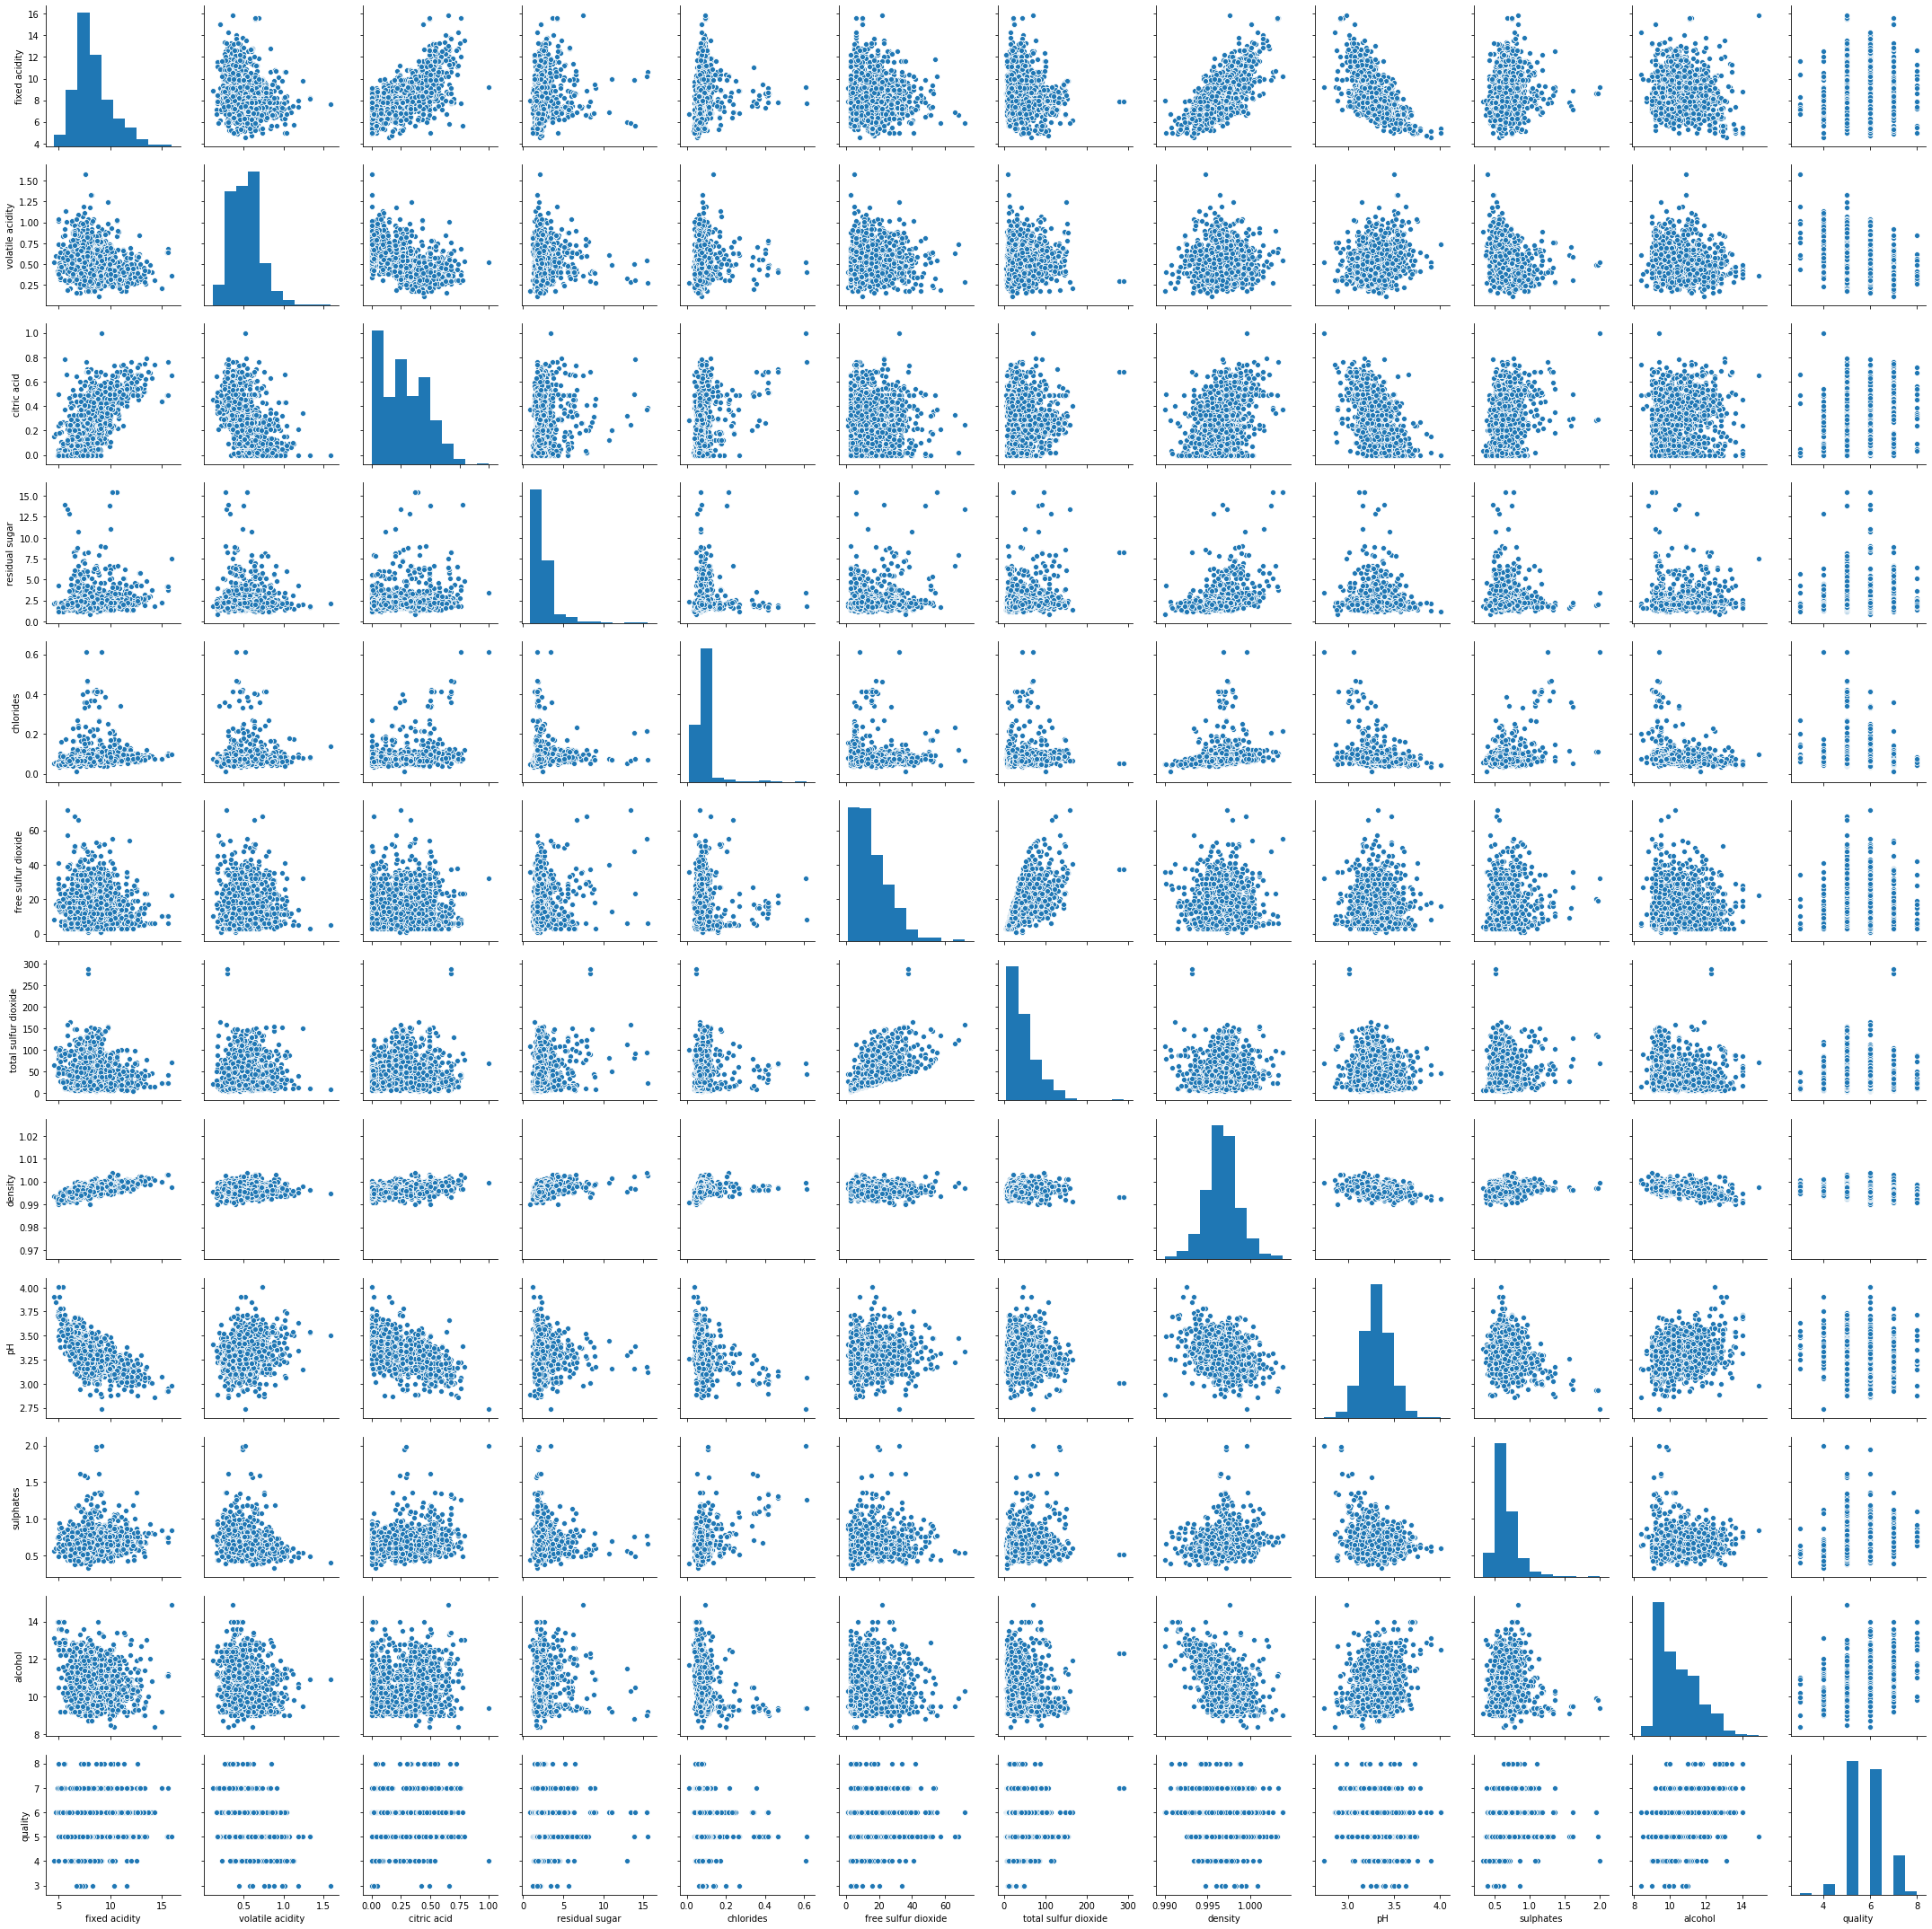

In [9]:
### use pairplot from seaborn

sns.pairplot(df_red)
plt.show()

In [10]:
# correlation matrix from pandas
df_cor_red = df_red.corr()

In [11]:
df_cor_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


To better understand the linear relation of each attribute we can be visualize the correlation matrix using a heatmap from seaborn. Below I created a function to create heatmaps of the correlation matrix for datasets. You are welcome to use this function later.

In [12]:
def plot_heatmap(df):
    
    """
    This function first creates a correlation matrix then visualizae 
    the correlation matrix using a heatmap from seaborn.
    """
    # heat map of correlation matrix
    # corr matrix
    df_cor = df.corr()
    
    # make figure
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_cor, annot=True)
    plt.tight_layout()
    plt.show()

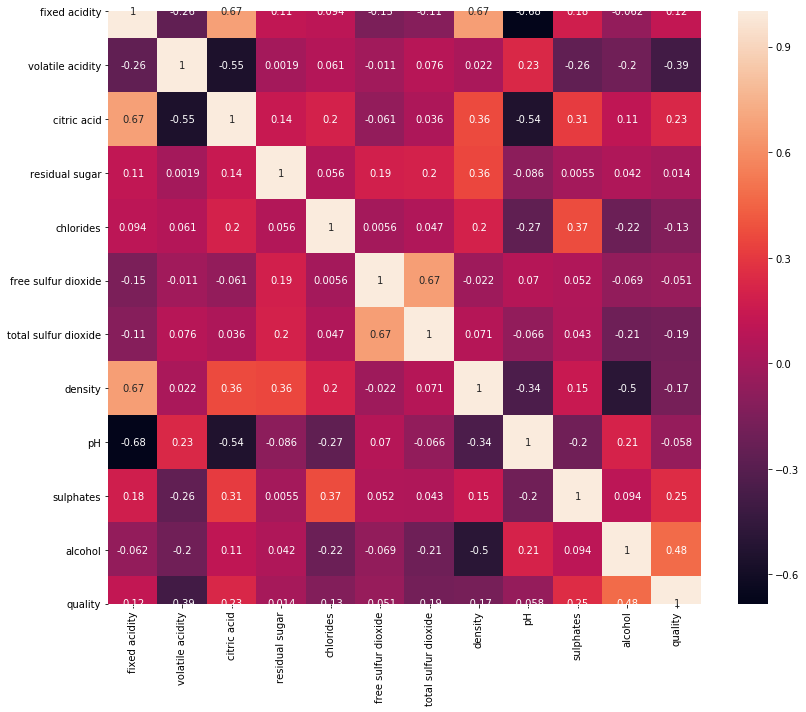

In [13]:
plot_heatmap(df_red)

### Split Data into Training and Testing

It is necessary to split the data into training and testing. The whole idea is a good model must have similar performance on the training data and on the data the model has never seen. For this reason the dataset must be splitted into training and testing data. The training data is used to train and tune the parameters of the model to operate at optimal conditions. The testing data is only used when after the model was optimized and performed well iin the training set. Sklearn offers a tool to split a dataset into training and testing, the module is called train_test_split. To use train_test_split we must first divide the data as the input features and the target variable, then we adjust the parameters according to our needs. For this problem the dataset was splitted as 75 percent for training and 25 percent for testing. The stratify parameter ensures that the training and testing datasets have the same ratio of wine quality. The parameter random_state makes sure the the split is reproducible, meaning that despite the samples are randomly sampled the random generator will be seeded to always start at the given number. When training and tunning the model we will only use the training data and leave the testing dataset to test the final model. The training data in the first split will be splitted a second time into training and testing. The secomnd will be used to train and validate the model as we tune every parameter to achieve optimal conditions. 

In [14]:
%%html
<img src='training_testing.png', width=700, height=700>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch06s02.html)

In [15]:
# split dataset into training and testing

y_red = df_red['alcohol'].values
x_red = df_red.drop(['alcohol'], axis=1)

In [16]:
x_tr_rd, x_ts_rd, y_tr_rd, y_ts_rd = train_test_split(x_red, y_red, train_size=0.75, 
                                                    stratify=x_red['quality'], random_state=42)

In [17]:
x_tr_rdv, x_ts_rdv, y_tr_rdv, y_ts_rdv = train_test_split(x_tr_rd, y_tr_rd, train_size=0.75, 
                                                  stratify=x_tr_rd['quality'], random_state=42)

In [18]:
x_tr_rd = x_tr_rd.drop('quality', axis=1)
x_ts_rd = x_ts_rd.drop('quality', axis=1)

x_tr_rdv = x_tr_rdv.drop('quality', axis=1)
x_ts_rdv = x_ts_rdv.drop('quality', axis=1)

In [19]:
x_tr_rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
686,7.1,0.650,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60
58,7.8,0.590,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66
1256,7.5,0.590,0.22,1.8,0.082,43.0,60.0,0.99499,3.10,0.42


### Bring Features to same Scale

When the features are at different scale is hard to pinpoint the features that actually have the most effect on the target variable and sometimes a sngle feqture can be misleading. On the other hand, when the features are at the same scale the importance of each feature can be categorized by the magnitude of it's respective weight. If you want to know more about data normalization and its advantages you can watch the following [video](https://www.youtube.com/watch?v=YKP31T5LIXQ). In this setion the features in the dataset will be converted to have the same scale. In practice three methods are used to bring data to same scale which are normalization, standardization, and power transform. All these modules can be loaded from the preprocessing module from sklearn. In this notebook we will only standardization. Data standardization proceeds by taking the difference of each observation to the mean value divided by the variance of the feature. This way the values will be centered at zero. 



$$x_{i}^{std} = \frac{x_{i} - \mu_{x}}{\sqrt{\sum_{i=1}^{N}(x_{i} - \mu_x)^{2}}}$$

In [20]:
std_x_rd = StandardScaler()
std_y_rd = StandardScaler()

In [21]:
x_tr_rdvstd = std_x_rd.fit_transform(x_tr_rdv)
y_tr_rdvstd = std_y_rd.fit_transform(y_tr_rdv.reshape(y_tr_rdv.shape[0], 1))

x_ts_rdvstd = std_x_rd.transform(x_ts_rdv)
y_ts_rdvstd = std_y_rd.transform(y_ts_rdv.reshape(y_ts_rdv.shape[0], 1))

In [22]:
x_tr_rdvstd = pd.DataFrame(x_tr_rdvstd, columns=x_tr_rdv.columns)
x_ts_rdvstd = pd.DataFrame(x_ts_rdvstd, columns=x_ts_rdv.columns)

In [23]:
x_tr_rdvstd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,-0.276925,2.890529,-1.170449,-0.261671,-0.103154,-0.299297,-0.550638,-0.477388,-0.572599,-0.659370
1,0.246091,2.412155,-1.170449,-0.562155,-0.274815,-1.056170,-0.861105,-0.335989,-0.037568,-1.277428
2,0.129865,-0.317393,-0.043641,-0.186549,-0.656284,-0.204688,-0.581685,-0.879829,-0.840115,0.745307
3,0.129865,-0.317393,0.110014,0.339298,-0.255741,1.309058,2.740309,0.447141,-0.037568,-0.771744
4,0.013639,-0.936466,0.212451,-0.261671,-0.160374,1.498276,1.001695,-0.205468,-0.037568,0.295810


In [24]:
x_tr_rdvstd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02,8.990000e+02
mean,-3.922829e-16,2.865092e-17,5.446144e-17,9.188053e-17,3.167655e-17,-6.397058e-17,1.089229e-16,-2.511549e-14,6.026572e-17,-1.354744e-16
std,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,-2.136540e+00,-2.062052e+00,-1.426541e+00,-1.012882e+00,-1.476443e+00,-1.339998e+00,-1.264711e+00,-3.337986e+00,-3.782786e+00,-1.558364e+00
25%,-6.837161e-01,-7.676277e-01,-9.143560e-01,-4.870339e-01,-3.701823e-01,-8.669522e-01,-7.990114e-01,-6.405396e-01,-6.394782e-01,-6.593702e-01
50%,-2.188124e-01,-3.599624e-02,-9.485966e-02,-2.616705e-01,-1.794476e-01,-2.046883e-01,-2.401714e-01,1.206853e-02,-3.756823e-02,-2.098735e-01
75%,5.657125e-01,6.393558e-01,8.270737e-01,3.881397e-02,3.036055e-02,5.521848e-01,5.049487e-01,5.858198e-01,5.643417e-01,4.643716e-01
max,4.372111e+00,4.522630e+00,3.695311e+00,9.654318e+00,9.948564e+00,4.904205e+00,3.361242e+00,3.759127e+00,3.640770e+00,7.487758e+00


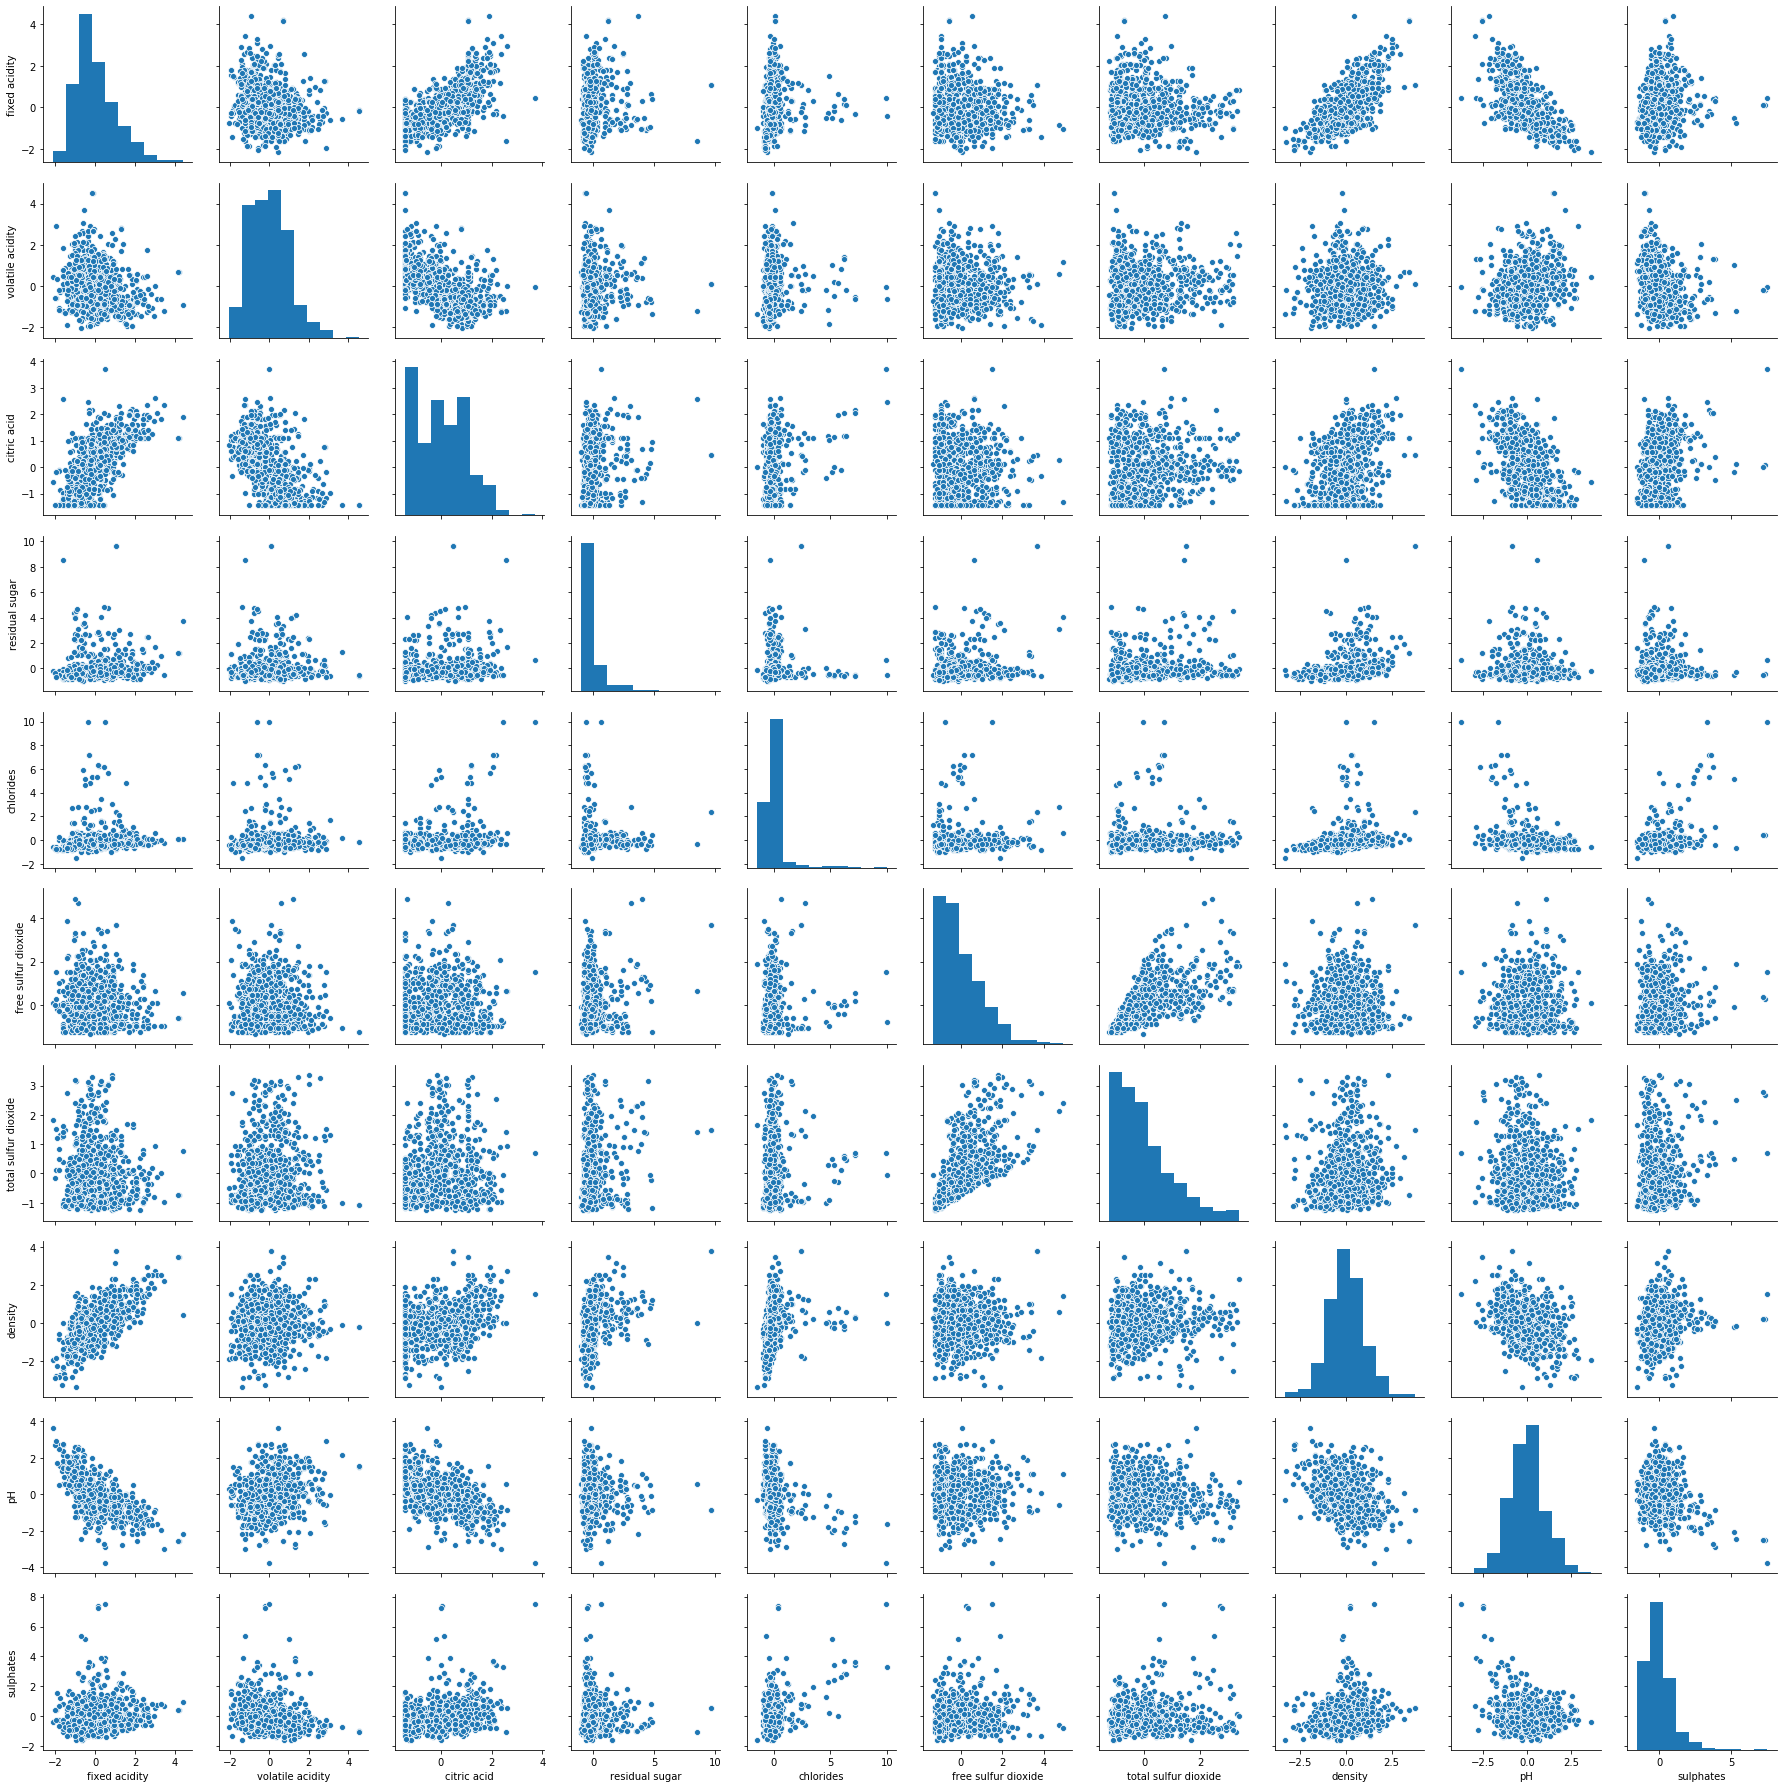

In [25]:
sns.pairplot(x_tr_rdvstd)
plt.show()

## Training Regression Model

In this part we will use LinearRegression from sklearn to create and train a model to compare the results of standizing a dataset. The quality of the model can measure by tow metrics, the MSE described above and R squared. R squared is defined as the difference of the ration of the squared error divided by the variance of the actual target. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{N}(y_{i} - \mu_{y})^{2}}$$

In [26]:
# linear regression model from scklearn.

lr = LinearRegression()

### Not Standardize Data

#### Training

In [27]:
# first seed

np.random.seed(42)

# FIT THE MODEL
lr.fit(x_tr_rdv, y_tr_rdv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
coef_df = pd.DataFrame([lr.coef_], columns=x_tr_rdv.columns)

In [29]:
coef_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.534216,0.555426,0.990769,0.30253,-1.836725,-0.002194,-0.002759,-632.098988,3.796485,1.454808


In [30]:
# show intercept
lr.intercept_

621.4913465426737

In [31]:
# predict the target used to train the model
y_tr_rdv_pred = lr.predict(x_tr_rdv)

In [32]:
# MSER for training set

mean_squared_error(y_tr_rdv, y_tr_rdv_pred)

0.3547816819738576

In [33]:
# R squared for training set
r2_score(y_tr_rdv, y_tr_rdv_pred)

0.692942941851022

#### Testinng

In [34]:
# predict target of testing set
y_ts_rdv_pred = lr.predict(x_ts_rdv)

In [35]:
# MSE for testing set
mean_squared_error(y_ts_rdv, y_ts_rdv_pred)

0.3385626702005012

In [36]:
# R squared for testing set
r2_score(y_ts_rdv, y_ts_rdv_pred)

0.6842846008512314

### Standardized Data

#### Training

In [37]:
lr.fit(x_tr_rdvstd, y_tr_rdvstd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
std_coef_df = pd.DataFrame(lr.coef_, columns = x_tr_rdvstd.columns)

In [39]:
std_coef_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.85521,0.091813,0.179959,0.374658,-0.089587,-0.021577,-0.082667,-1.081292,0.528107,0.240879


In [40]:
lr.intercept_

array([-2.66388766e-14])

In [41]:
y_tr_rdvstd_pred = lr.predict(x_tr_rdvstd)

In [42]:
mean_squared_error(y_tr_rdvstd, y_tr_rdvstd_pred)

0.30705705814897655

In [43]:
r2_score(y_tr_rdvstd, y_tr_rdvstd_pred)

0.6929429418510233

#### Testing

In [44]:
y_ts_rdvstd_pred = lr.predict(x_ts_rdvstd)

In [45]:
mean_squared_error(y_ts_rdvstd, y_ts_rdvstd_pred)

0.2930198000427968

In [46]:
r2_score(y_ts_rdvstd, y_ts_rdvstd_pred)

0.6842846008512364

## Tune Linear Regression Model


### Linear Model Regularizartion

Another great news is that there are linear models that helps us identify which features are basically useless and which are not. One example is the Lasso algorithm where the weights for useless features approxiamtes zero. This is achieved by a small modification on the cost function which was explicitly defined above. The cost function of Lasso is:


$$J(w)_{Lasso} = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \alpha\sum_{j=1}^{m} \lvert{w_j}\lvert$$

Another important topic in statistics is cross validation. Cross validation divides the dataset into k-fold partitions to train and test the model. In this section we will make use of GridSearchCV a sklearn tool that allows to do cross-validation and model tuning at the same time. To tune the model we will check which $\alpha$ yields the best $R^{2}$.

In [47]:
%%html
<img src='cros_val.png', width=700, height=700>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch06s02.html)

In [48]:
lasso = Lasso(random_state=42, selection='random')

In [49]:
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100]}

In [50]:
lass_cv = GridSearchCV(lasso, parameter, cv=10, refit=True)

In [51]:
std_x_rd_t = StandardScaler()
std_y_rd_t = StandardScaler()

In [52]:
x_tr_rd_t, x_ts_rd_t = std_x_rd_t.fit_transform(x_tr_rd), std_x_rd_t.transform(x_ts_rd)
y_tr_rd_t, y_ts_rd_t = std_y_rd_t.fit_transform(y_tr_rd.reshape(-1, 1)), std_y_rd_t.transform(y_ts_rd.reshape(-1, 1))

In [53]:
lass_cv.fit(x_tr_rd_t, y_tr_rd_t)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='random', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
lass_cv.best_params_

{'alpha': 0.001}

In [55]:
lass_cv.best_score_

0.6817019803975688

## Test Regression Model

In this sectio we train the lasso regressor with the best parameters given by GridSearchCV. Then test the model performance using the testing dataset.

In [56]:
lasso = Lasso(random_state=42, selection='random', alpha = 0.001)

In [57]:
lasso.fit(x_tr_rd_t, y_tr_rd_t)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='random', tol=0.0001, warm_start=False)

In [58]:
y_tr_rd_t_pred = lasso.predict(x_tr_rd_t)
y_ts_rd_t_pred = lasso.predict(x_ts_rd_t)

In [59]:
mean_squared_error(y_tr_rd_t, y_tr_rd_t_pred)

0.30790430361558263

In [60]:
mean_squared_error(y_ts_rd_t, y_ts_rd_t_pred)

0.3980442479151092

In [61]:
r2_score(y_tr_rd_t, y_tr_rd_t_pred)

0.6920956963844174

In [62]:
r2_score(y_ts_rd_t, y_ts_rd_t_pred)

0.6015541904238666

### Model Quality

In [63]:
# convert to the original target values

# training set
y_tr_rd_t, y_tr_rd_t_pred = std_y_rd_t.inverse_transform(y_tr_rd_t), std_y_rd_t.inverse_transform(y_tr_rd_t_pred)

# testing set
y_ts_rd_t, y_ts_rd_t_pred = std_y_rd_t.inverse_transform(y_ts_rd_t), std_y_rd_t.inverse_transform(y_ts_rd_t_pred)

In [64]:
def plot_error_pred(y, y_pred):
    """
    This function plots the error of the predicted target.
    """
    error = y - y_pred

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(y_pred, error,
            c='steelblue', 
            edgecolor='white', 
            marker='o')

    ax.plot(np.arange(min(y_pred), 
                      max(y_pred)), 
                      0*np.arange(min(y_pred), 
                      max(y_pred)), 
                      color='red', 
                      lw=2, 
                      linestyle='dashed')
    
    ax.set_xlabel('$\hat{y}$', fontsize=15)
    
    ax.set_ylabel('$y$ - $\hat{y}$', fontsize=15)
    
    plt.title('$y$ - $\hat{y}$ versus $\hat{y}$', fontsize=18)
    
    plt.show()

In [65]:
def plot_error_actu(y, y_pred):
    """
    This function plots the error of the actual target.
    """
    error = y - y_pred

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(y, error,
            c='steelblue', 
            edgecolor='white', 
            marker='o')

    ax.plot(np.arange(min(y_pred), 
                      max(y_pred)), 
                      0*np.arange(min(y_pred), 
                      max(y_pred)), 
                      color='red', 
                      lw=2, 
                      linestyle='dashed')
    
    ax.set_xlabel('$y$', fontsize=15)
    ax.set_ylabel('$y$ - $\hat{y}$', fontsize=15)
    plt.title('$y$ - $\hat{y}$ versus $y$', fontsize=18)
    plt.show()

#### Training

In [66]:
y_ts_rd_t.shape, y_ts_rd_t_pred.shape

((400, 1), (400,))

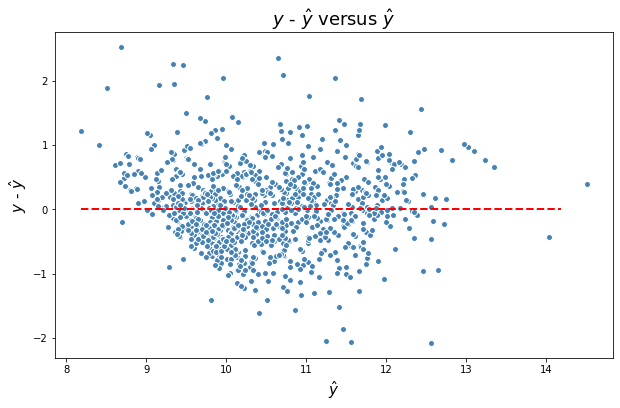

In [67]:
plot_error_pred(y_tr_rd_t, y_tr_rd_t_pred.reshape(1199, 1))

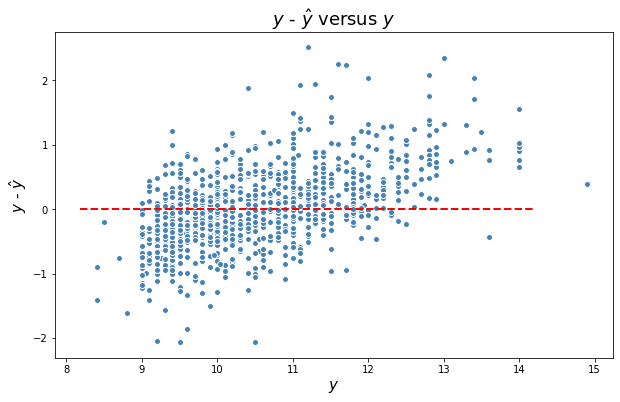

In [68]:
plot_error_actu(y_tr_rd_t, y_tr_rd_t_pred.reshape(1199, 1))

### Testing

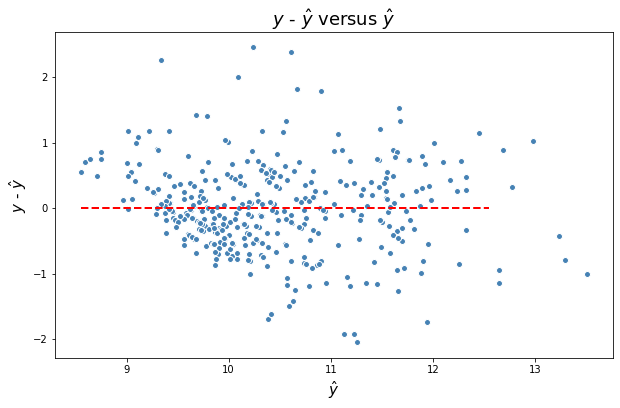

In [69]:
plot_error_pred(y_ts_rd_t, y_ts_rd_t_pred.reshape(400, 1))

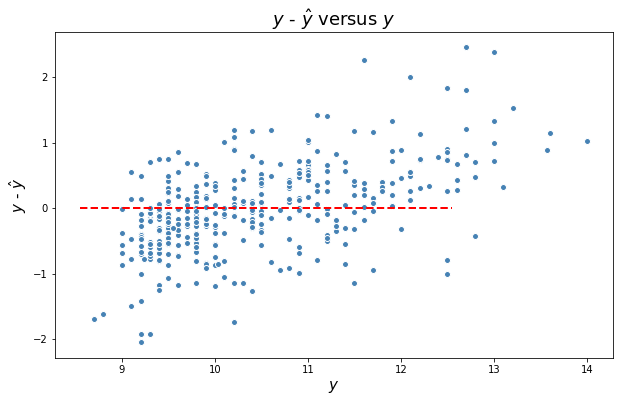

In [70]:
plot_error_actu(y_ts_rd_t, y_ts_rd_t_pred.reshape(400, 1))

## Exercise

### Define the problem

### State the objective

### Feature Engineering

In this section you will work with pandas library to load the dataset and perform operations that only pandas allows.

In [71]:
# load data of white wine using pandas


In [72]:
# print the first 5 rows of the white wine dataset


In [73]:
# print the shape of the white wine dataset


In [74]:
# check if there are null values


In [75]:
# check the descriptive statistics of the dataset



### Exploratory Data Analysis

In this part you will continue using pandas but will also use seaborn to visualize the relation of the features.

In [76]:
# use seaborn to create a pairplot



In [77]:
# make a correlation matrix with pandas



In [78]:
# use the plot_heatmap function to create a heatmap of the correlation matrix



### Split of Training and Testing Data

In [79]:
# use train_tes_split to split the dataset, make two splits



### Bring Features to same Scale

In [80]:
# in this part you will use StandardScaler to standardize the data to be used for tuning



In [81]:
# in this part you will use PowerTransformer to standardize the data to be used for tuning



## Train Linear Regression Model

In [82]:
# in this part you will use LinearRegression to create a linear model



In [83]:
# print the MSE from the training data


In [84]:
# print the R squared from the training data


In [85]:
# print the MSE from the testing data


In [86]:
# print the R squared from the testing data


## Tune Linear Regression Model

In [87]:
# use GridSearchCV to tune the Lasso model by changing alpha and cv = 10



In [88]:
# use Lasso for the following

# print the MSE from the training data


# print the R squared from the training data


# print the MSE from the testing data


# print the R squared from the testing data


# comment on the results

In [89]:
# use GridSearchCV to tune the Ridge model by changing alpha and cv = 10



In [90]:
# use Ridge for the following

# print the MSE from the training data


# print the R squared from the training data


# print the MSE from the testing data


# print the R squared from the testing data


# comment on the results

## Test Regression Model

In this part you will choose the model with best results and re-train the model and then test it.

In [91]:
# use the function plot_error_pred to know how the training performance



In [92]:
# use the function plot_error_actu to know how the training performance



In [93]:
# use the function plot_error_pred to know how the testing performance



In [94]:
# use the function plot_error_actu to know how the testing performance



## Extra, SVR Tuning

Support Vector Machine (SVM) is a popular algorithm used in Supervised Machine Learning. For more information check [SVM Scikit-Learn](https://scikit-learn.org/stable/modules/svm.html).

In [95]:
# use GridSearchCV to tune the SVR model by changing kernel and C with cv = 10



In [96]:
# use SVR for the following

# print the MSE from the training data


# print the R squared from the training data


# print the MSE from the testing data


# print the R squared from the testing data


# comment on the results

## Extra, SVR Model Quality

In [97]:
# use the function plot_error_pred to know how the training performance



In [98]:
# use the function plot_error_actu to know how the training performance



In [99]:
# use the function plot_error_pred to know how the testing performance



In [100]:
# use the function plot_error_actu to know how the testing performance

